In [14]:
from collections import deque

graph = {
    'Karachi': ['Rawalpindi', 'Multan'],
    'Multan': ['Lahore', 'Hyderabad'],
    'Hyderabad': ['Karachi', 'Multan'],
    'Rawalpindi': ['Islamabad'],
    'Islamabad': ['Gilgit'],
    'Gilgit': ['Lahore'],
    'Lahore': ['Islamabad']
}

def BFS(start):
    visited = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node)
            visited.add(node)
            queue.extend(graph[node])

def DFS(start, visited=None):
    if visited is None:
        visited = set()
    print(start, end=' ')
    visited.add(start)
    for neighbor in graph[start]:
        if neighbor not in visited:
            DFS(neighbor, visited)

print("BFS Traversal:")
BFS('Karachi')

print("\nDFS Traversal:")
DFS('Islamabad')


BFS Traversal:
Karachi
Rawalpindi
Multan
Islamabad
Lahore
Hyderabad
Gilgit

DFS Traversal:
Islamabad Gilgit Lahore 

In [28]:
from collections import deque
import time
import tracemalloc

# Jug capacities and goal
JUG1 = 4
JUG2 = 3
GOAL = 2
START = (0, 0)

# Function to get possible next moves
def next_states(state):
    a, b = state
    states = set()

    # Fill jugs
    states.add((JUG1, b))
    states.add((a, JUG2))
    # Empty jugs
    states.add((0, b))
    states.add((a, 0))
    # Pour from one jug to another
    pour = min(a, JUG2 - b)
    states.add((a - pour, b + pour))
    pour = min(b, JUG1 - a)
    states.add((a + pour, b - pour))

    return states

# BFS (Breadth First Search)
def BFS(start):
    visited = set()
    queue = deque([(start, [start])])
    steps = 0

    while queue:
        state, path = queue.popleft()
        steps += 1

        if GOAL in state:
            return path, steps

        visited.add(state)
        for s in next_states(state):
            if s not in visited:
                queue.append((s, path + [s]))

# DFS (Depth First Search)
def DFS(start):
    stack = [(start, [start])]
    visited = set()
    steps = 0

    while stack:
        state, path = stack.pop()
        steps += 1

        if GOAL in state:
            return path, steps

        visited.add(state)
        for s in next_states(state):
            if s not in visited:
                stack.append((s, path + [s]))

# Compare BFS and DFS
def compare():
    print("=== Water Jug Problem ===")

    # BFS
    tracemalloc.start()
    t1 = time.time()
    bfs_path, bfs_steps = BFS(START)
    bfs_time = time.time() - t1
    bfs_memory = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    # DFS
    tracemalloc.start()
    t2 = time.time()
    dfs_path, dfs_steps = DFS(START)
    dfs_time = time.time() - t2
    dfs_memory = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    # Print results
    print("\nBFS Path:", bfs_path)
    print("BFS Steps:", bfs_steps)
    print("BFS Time: %.6f sec" % bfs_time)
    print("BFS Memory:", bfs_memory, "bytes")

    print("\nDFS Path:", dfs_path)
    print("DFS Steps:", dfs_steps)
    print("DFS Time: %.6f sec" % dfs_time)
    print("DFS Memory:", dfs_memory, "bytes")

    print("\nSummary:")
    print("BFS finds the shortest path but uses more memory.")
    print("DFS may use less memory but not always shortest.")

compare()


=== Water Jug Problem ===

BFS Path: [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)]
BFS Steps: 12
BFS Time: 0.000236 sec
BFS Memory: 2432 bytes

DFS Path: [(0, 0), (0, 3), (4, 3), (4, 0), (1, 3), (1, 0), (0, 1), (4, 1), (2, 3)]
DFS Steps: 9
DFS Time: 0.000150 sec
DFS Memory: 1736 bytes

Summary:
BFS finds the shortest path but uses more memory.
DFS may use less memory but not always shortest.


In [29]:
import heapq

maze = {
    'A': ['B', 'F'],
    'B': ['A', 'C'],
    'C': ['B', 'D'],
    'D': ['C', 'E'],
    'E': ['D'],
    'F': ['A', 'G'],
    'G': ['F', 'H'],
    'H': ['G', 'I'],
    'I': ['H', 'J'],
    'J': ['I', 'K'],
    'K': ['J'],
    'M': ['N'],
    'N': ['M', 'O'],
    'O': ['N', 'P'],
    'P': ['O', 'Q'],
    'Q': ['P'],
    'R': ['S'],
    'S': ['R', 'T'],
    'T': ['S', 'U'],
    'U': ['T', 'V'],
    'V': ['U'],
    'W': ['X'],
    'X': ['W', 'Y'],
    'Y': ['X']
}

heuristic = {node: abs(ord('Y') - ord(node)) for node in maze}

def a_star(start, goal):
    open_set = [(0 + heuristic[start], 0, start, [])]
    visited = set()
    while open_set:
        est_total, cost, node, path = heapq.heappop(open_set)
        if node in visited:
            continue
        visited.add(node)
        path = path + [node]
        if node == goal:
            return path
        for neighbor in maze.get(node, []):
            if neighbor not in visited:
                heapq.heappush(open_set, (cost + 1 + heuristic[neighbor], cost + 1, neighbor, path))
    return None

path = a_star('A', 'Y')
print("A* Path from A to Y:", path)

A* Path from A to Y: None


In [19]:
student = {
    'name':"Yawar Hussain",
    'age':21,
    'roll_no':122,
    'Grade':'B'
}
# Print all keys and values.
print(student)
# Update Grade
student['Grade'] = 'A'
print("Update student Grade ")
print(student)
#Add a new key email with a value
student['email'] = "yawar123@gmail.com"
print(student)
#Delete the roll_number key.
del student['roll_no']
print(student)

{'name': 'Yawar Hussain', 'age': 21, 'roll_no': 122, 'Grade': 'B'}
Update student Grade 
{'name': 'Yawar Hussain', 'age': 21, 'roll_no': 122, 'Grade': 'A'}
{'name': 'Yawar Hussain', 'age': 21, 'roll_no': 122, 'Grade': 'A', 'email': 'yawar123@gmail.com'}
{'name': 'Yawar Hussain', 'age': 21, 'Grade': 'A', 'email': 'yawar123@gmail.com'}


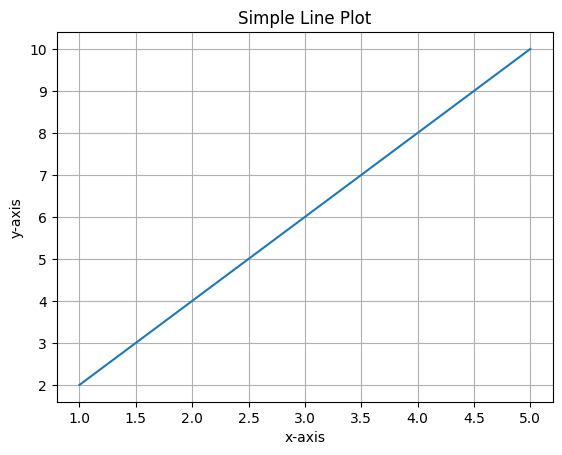

In [25]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y = [2,4,6,8,10]

plt.plot(x,y)
plt.title("Simple Line Plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()